## Some Properties of Random Numbers
An investigation of factors that could increase the number of correlations in data due to randomness. I was inspired to look into this because of Nassim Taleb's claim in Antifragile that 'there is a certain property of data: in large data sets, large deviations are vastly more attributable to noise (or variance) than to information (or signal)." He then shows a graph that shows correlations are nonlinear as a function of the number of variables (p. 417). 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(1)

This is the function we will use to determine the number of correlations above (or below if negatively correlated) a certain cutoff point. Due to the limitations of processing speed, we are looking at correlations above the absolute value of 0.2. If we were to look at correlations > 0.2, I believe we will see the same nonlinear relationship. I do not have the processing power to show if this is true. I've included the mean highest coefficient for people to decide themselves. I am deliberately avoiding the conversation around pseudorandom generated numbers.

In [15]:
def pandas_correlation(num_var= 5, var_size=100, var_range=100, r_cutoff=0.2):
    df = pd.DataFrame()
    _helper = 'a'
    _total = 0
    greatest_coef = 0
    for i in range(2, num_var+1):
        row_name = str(i) + _helper
        df[row_name] = np.random.randint(0, var_range, var_size)        
    df_corr = df.corr()
    col_names = df_corr.columns
    #Beware: the num_var is checked factorially
    for i in range(len(df_corr)):
        for j in range(len(col_names)):
            if abs(df_corr.iloc[i][j]) > greatest_coef and df_corr.iloc[i][j] != 1:
                greatest_coef = abs(df_corr.iloc[i][j])
            if abs(df_corr.iloc[i][j]) > r_cutoff:
                if df_corr.iloc[i][j] != 1:
                    _total += 1
    return _total, greatest_coef

### The number of variables and the incidences of correlation.
Remember that this research considers a correlation above 0.2 to be significant.

In [16]:
number_corr = []
highest_corr = []
#We will look at data from 2 variables to 200 variables.
for i in range(2, 201):
    n, h = pandas_correlation(num_var = i)
    number_corr.append(n)
    highest_corr.append(h)

The incidences of correlation as a function of the number of variables.

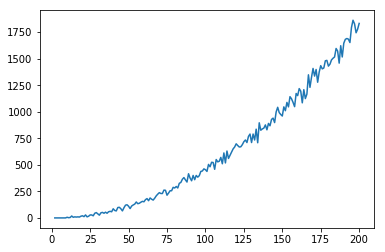

In [17]:
plt.plot(list(range(2,201)), number_corr)
plt.show()
# x-axis is the number of variables 
# y-axis is the number of correlations above 0.2

Distribution of the largest correlations. 

<function matplotlib.pyplot.show>

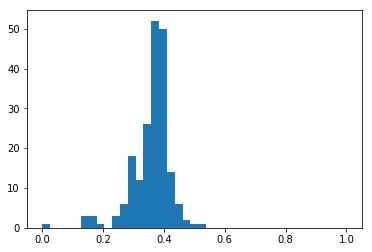

In [18]:
bins = np.linspace(0.0, 1.0, 40)
plt.hist(highest_corr, bins)
plt.show

We will increase the number of variables to 350 to further see the nonlinearity. 

In [42]:
number_corr = []
highest_corr = []
for i in range(2, 351):
    n, h = pandas_correlation(num_var = i)
    number_corr.append(n)
    highest_corr.append(h)

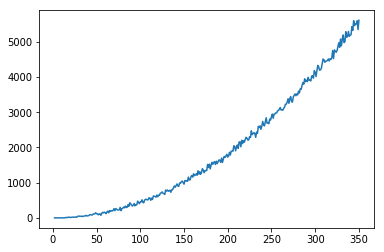

In [43]:
plt.plot(list(range(2,351)), number_corr)
plt.show()

<function matplotlib.pyplot.show>

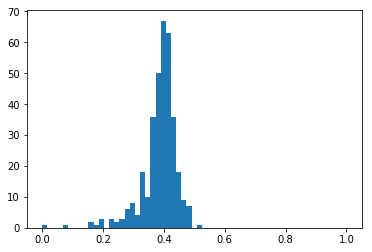

In [44]:
bins = np.linspace(0.0, 1.0, 60)
plt.hist(highest_corr, bins)
plt.show

### The effect of the amount of data points on correlation.
What is the difference in the number of correlations when comparing x = [1,2,3] y = [7,8,9] and another dataset with x = [1,2,3,4,5,6] y = [7,8,9,10,11,12]?

In [22]:
number_corr = []
highest_corr = []
trials = 1000
for i in range(2, 201):
    _n = []
    _h = []
    for j in range(trials):
        n, h = pandas_correlation(num_var=10, var_size=i)
        _n.append(n)
        _h.append(h)
    number_corr.append(sum(_n)/trials)
    highest_corr.append(sum(_h)/trials)

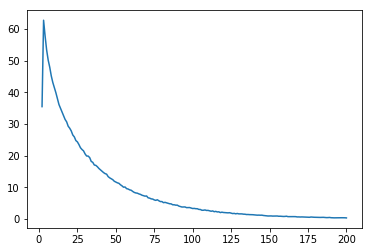

In [23]:
plt.plot(list(range(2,201)), number_corr)
plt.show()
# x-axis is the number of data points 
# y-axis is the number of correlations above 0.2

<function matplotlib.pyplot.show>

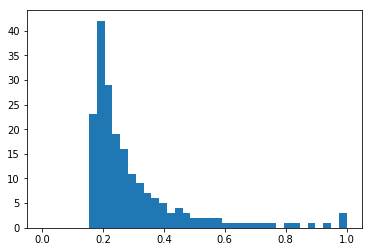

In [24]:
bins = np.linspace(0.0, 1.0, 40)
plt.hist(highest_corr, bins)
plt.show

We'll check if there is any differences when we increase the number of variables to 50.

In [33]:
number_corr = []
highest_corr = []
trials = 50 
for i in range(2, 201):
    _n = []
    _h = []
    for j in range(trials):
        n, h = pandas_correlation(num_var=50, var_size=i)
        _n.append(n)
        _h.append(h)
    number_corr.append(sum(_n)/trials)
    highest_corr.append(sum(_h)/trials)

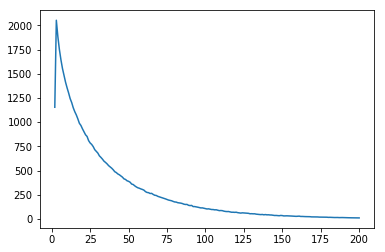

In [34]:
plt.plot(list(range(2,201)), number_corr)
plt.show()

<function matplotlib.pyplot.show>

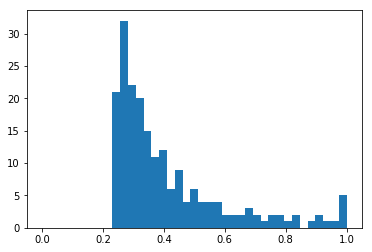

In [35]:
bins = np.linspace(0.0, 1.0, 40)
plt.hist(highest_corr, bins)
plt.show

### The effect of the range of data points on correlation.
What is the difference between A, B when A contains value 1-10 inclusive and B contains 1-50 inclusive?

In [25]:
number_corr = []
highest_corr = []
trials = 100
for i in range(2, 201):
    _n = []
    _h = []
    for j in range(trials):
        n, h = pandas_correlation(num_var=10, var_range=i)
        _n.append(n)
        _h.append(h)
    number_corr.append(sum(_n)/trials)
    highest_corr.append(sum(_h)/trials)

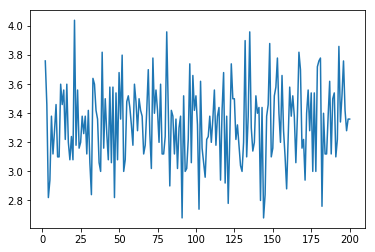

In [26]:
plt.plot(list(range(2,201)), number_corr)
plt.show()
# x-axis is the number of variables 
# y-axis is the number of correlations above 0.2

If we scale out, the graph is much clearer and we see that the range of data points has little effect. 

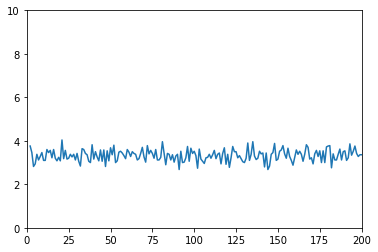

In [32]:
plt.plot(list(range(2,201)), number_corr)
plt.axis([0,200,0,10])
plt.show()

Clearly, the range of data points has little effect on the total number of correlations.

<function matplotlib.pyplot.show>

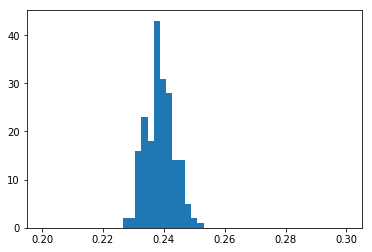

In [30]:
bins = np.linspace(0.2, 0.3, 50)
plt.hist(highest_corr, bins)
plt.show

We will now double the number of variables.

In [36]:
number_corr = []
highest_corr = []
trials = 100
for i in range(2, 201):
    _n = []
    _h = []
    for j in range(trials):
        n, h = pandas_correlation(num_var=20, var_range=i)
        _n.append(n)
        _h.append(h)
    number_corr.append(sum(_n)/trials)
    highest_corr.append(sum(_h)/trials)

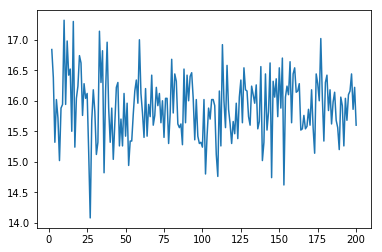

In [37]:
plt.plot(list(range(2,201)), number_corr)
plt.show()

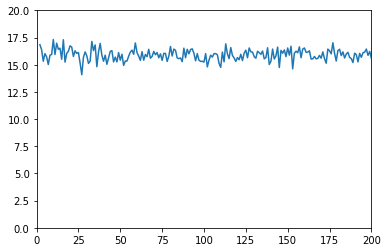

In [38]:
plt.plot(list(range(2,201)), number_corr)
plt.axis([0,200,0,20])
plt.show()

<function matplotlib.pyplot.show>

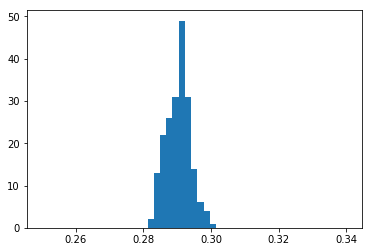

In [41]:
bins = np.linspace(0.25, 0.34, 50)
plt.hist(highest_corr, bins)
plt.show()

Double check

### The effect of both number of data points and number of variables on correlation
The amount of data points will mitigate spurious correlations due to the number of variables. 

In [45]:
number_corr = []
highest_corr = []
x_y = [[],[]] 
for i in range(2, 201):
    for j in range(2,201):
        n, h = pandas_correlation(num_var=i, var_size=j)
        number_corr.append(n)
        highest_corr.append(h)
        x_y[0].append(i)
        x_y[1].append(j)

In [49]:
from mpl_toolkits.mplot3d import Axes3D

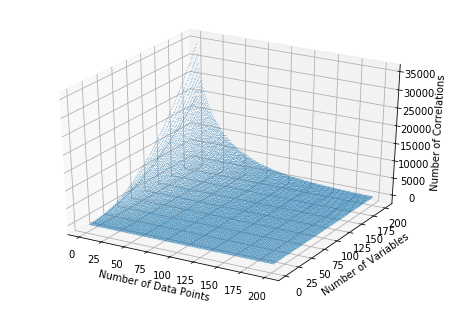

In [73]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Number of Data Points')
ax.set_ylabel('Number of Variables')
ax.set_zlabel('Number of Correlations')
ax.scatter(x_y[1], x_y[0], number_corr, s=0.01, depthshade=False)
plt.show()

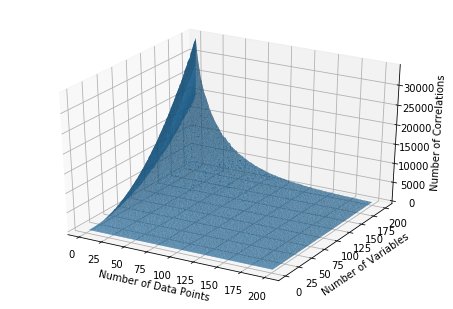

In [62]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Number of Data Points')
ax.set_ylabel('Number of Variables')
ax.set_zlabel('Number of Correlations')
ax.plot_trisurf(x_y[1], x_y[0], number_corr)
plt.show()

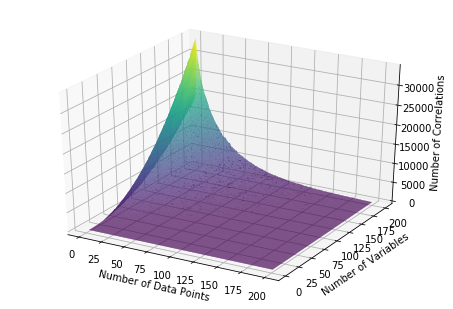

In [76]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Number of Data Points')
ax.set_ylabel('Number of Variables')
ax.set_zlabel('Number of Correlations')
ax.plot_trisurf(x_y[1], x_y[0], number_corr, cmap='viridis')
plt.show()

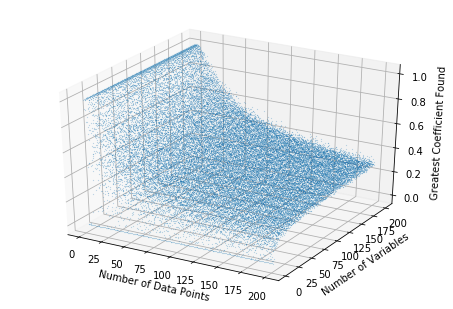

In [78]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Number of Data Points')
ax.set_ylabel('Number of Variables')
ax.set_zlabel('Greatest Coefficient Found')
ax.scatter(x_y[1], x_y[0], highest_corr, s=0.01, depthshade=False)
plt.show()

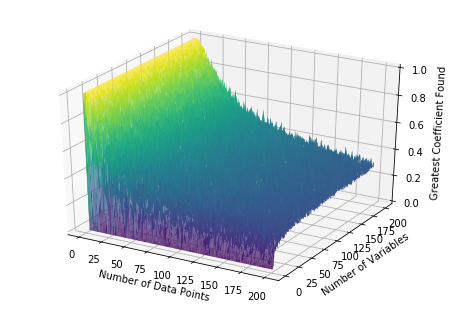

In [80]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Number of Data Points')
ax.set_ylabel('Number of Variables')
ax.set_zlabel('Greatest Coefficient Found')
ax.plot_trisurf(x_y[1], x_y[0], highest_corr, cmap='viridis')
plt.show()

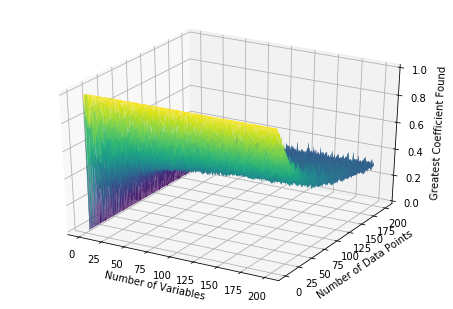

In [87]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Number of Variables')
ax.set_ylabel('Number of Data Points')
ax.set_zlabel('Greatest Coefficient Found')
ax.plot_trisurf(x_y[0], x_y[1], highest_corr, cmap='viridis')
plt.show()

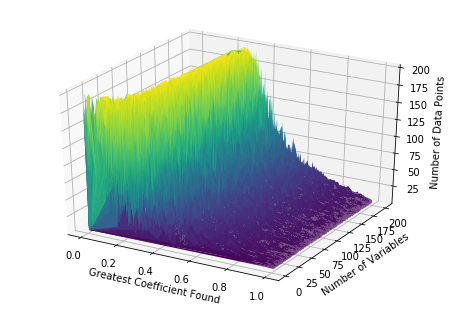

In [94]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Greatest Coefficient Found')
ax.set_ylabel('Number of Variables')
ax.set_zlabel('Number of Data Points')
ax.plot_trisurf(highest_corr, x_y[0], x_y[1], cmap='viridis')
plt.show()